### 1. Importación de Librerías y Carga de Datos

In [1]:
# main_script.py

import pandas as pd
from functions import load_data, explore_data, analyze_missing_values, preprocess_data, filter_data, clean_sex_column, analyze_attacks_by_sex, analyze_attacks_by_year, analyze_fatal_attacks

In [2]:
ruta_archivo = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = load_data(ruta_archivo)

### 2. Exploración Inicial de los Datos

In [3]:
explore_data(df)

Shape of DataFrame: (6969, 23)
Columns in DataFrame: Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


### 3. Análisis de Valores Faltantes


In [4]:
analyze_missing_values(df)

                Missing values  Missing %
Date                        25   0.358732
Year                        27   0.387430
Type                        43   0.617018
Country                     75   1.076195
State                      507   7.275075
Location                   590   8.466064
Activity                   611   8.767398
Name                       245   3.515569
Sex                        604   8.666954
Age                       3019  43.320419
Injury                      60   0.860956
Unnamed: 11                587   8.423016
Time                      3551  50.954226
Species                   3157  45.300617
Source                      44   0.631367
pdf                        170   2.439374
href formula               150   2.152389
href                       173   2.482422
Case Number                171   2.453724
Case Number.1              172   2.468073
original order             170   2.439374
Unnamed: 21               6968  99.985651
Unnamed: 22               6967  99

,Missing values,Missing %
Date,25,0.358732
Year,27,0.387430
Type,43,0.617018
Country,75,1.076195
State,507,7.275075
Location,590,8.466064
Activity,611,8.767398
Name,245,3.515569
Sex,604,8.666954
Age,3019,43.320419


### 4. Preprocesamiento de Datos


In [5]:
# Eliminar espacios en blanco y convertir todos los nombres de columna a minúsculas
df.columns = df.columns.str.strip().str.lower()

In [6]:
# Seleccionar varias columnas y mostrar una muestra aleatoria de 5 filas
df[['date', 'year', 'type', 'country', 'state', 'location', 'activity', 'name', 'sex', 'age', 'injury', 'unnamed: 11', 'source', 'pdf', 'href formula', 'href', 'case number', 'case number.1', 'original order']].sample(5)

,date,year,type,country,state,location,activity,name,sex,age,injury,unnamed: 11,source,pdf,href formula,href,case number,case number.1,original order
3749,05-Mar-1978,1978.0,Watercraft,SOUTH AFRICA,Eastern Cape Province,"Gulu Deep, East London",NaN,"6 m skiboat, occupants: P.A. Reeder & crew",NaN,NaN,No injury to occupants; shark rammed boat 4 ti...,N,GSAF,1978.03.05-GuluDeep.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.03.05,1978.03.05,3193.0
2619,25-Sep-2000,2000.0,Unprovoked,AUSTRALIA,South Australia,"Black Point, Eyre Peninsula",Surfing,Jevan Wright,M,17,FATAL,Y,"T. Peake, GSAF",2000.09.25-Wright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.09.25,2000.09.25,4323.0
5888,03-Feb-1920,1920.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Zwartkops River,Floating face down,Thea Toft,F,18,Abdomen bitten,N,"T. Toft, M. Levine, GSAF",1920.02.03-Toft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1920.02.03,1920.02.03,1055.0
2898,02-Sep-1996,1996.0,Unprovoked,USA,Florida,"Behune Beach, Volusia County",Standing,William (or Richard) Schwall,M,5,Right foot bitten,N,"S. Petersohn, GSAF; Orlando Sentinel , 9//7/19...",1996.09.02.b-Schwall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.09.02.b,1996.09.02.b,4044.0
6410,18-Aug-1884,1884.0,Invalid,USA,New York,Jamaica Bay,Clamming,Stephen Rylor,M,NaN,Unclear if he sustained any injury from the 7'...,NaN,"New York Times, 8/20/1884",1884.08.18-Rylor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1884.08.18,1884.08.18,533.0


In [7]:
# Eliminar todas las columnas que no contienen información relevante para nuestras hipótesis. 
df.drop(["state", "location", "activity", "name", "age", "injury", "source", "pdf", "href formula","href", "case number", "case number.1", "original order", "unnamed: 21", "unnamed: 22", "time", "species"], axis=1, inplace=True)

In [8]:
# Cambiar el nombre de la columna 'unnamed: 11' a 'new_name'
df.rename(columns={'unnamed: 11': 'fatal attack: yes/no'}, inplace=True)

In [9]:
df.columns

Index(['date', 'year', 'type', 'country', 'sex', 'fatal attack: yes/no'], dtype='object')

### 5. Filtrado de Datos

In [10]:
df = filter_data(df)

Número de filas vacías en la columna 'Year': 27
Número de filas después de eliminar las vacías: 6942
Número de filas después de filtrar: 3121
[1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0]


### 6. Limpieza de Datos

In [11]:
# Eliminar filas con datos nulos en cualquier columna
df_cleaned_all = df.dropna()

# Mostrar el DataFrame después de eliminar filas con nulos en cualquier columna
print("\nDataFrame después de eliminar filas con datos nulos en cualquier columna:")
df_cleaned_all


DataFrame después de eliminar filas con datos nulos en cualquier columna:


,date,year,type,country,sex,fatal attack: yes/no
10,30 Dec-2023,2023.0,Unprovoked,USA,M,Y
11,29 Dec-2023,2023.0,Unprovoked,MEXICO,M,Y
12,28 Dec-2023,2023.0,Unprovoked,AUSTRALIA,M,Y
13,25 Dec-2023,2023.0,Unprovoked,AUSTRALIA,M,N
14,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,M,N
...,...,...,...,...,...,...
3125,23-Jan-1993,1993.0,Unprovoked,BRAZIL,M,N
3126,05-Jan-1993,1993.0,Unprovoked,AUSTRALIA,M,N
3127,04-Jan-1993,1993.0,Watercraft,CARIBBEAN SEA,M,N
3128,02-Jan-1993,1993.0,Unprovoked,USA,M,N


### 7. Corrección de Valores en la Columna 'sex'

In [12]:
df = clean_sex_column(df)

Conteo de cada valor en la columna 'sex':
sex
M    2424
F     535
Name: count, dtype: int64


In [13]:
df['year'] = df['year'].astype(int)

### 8. Análisis y Visualización de Datos

Número total de ataques por genero:
sex
M    2158
F     481
Name: count, dtype: int64

Proporción de ataques por genero:
sex
M    0.817734
F    0.182266
Name: count, dtype: float64


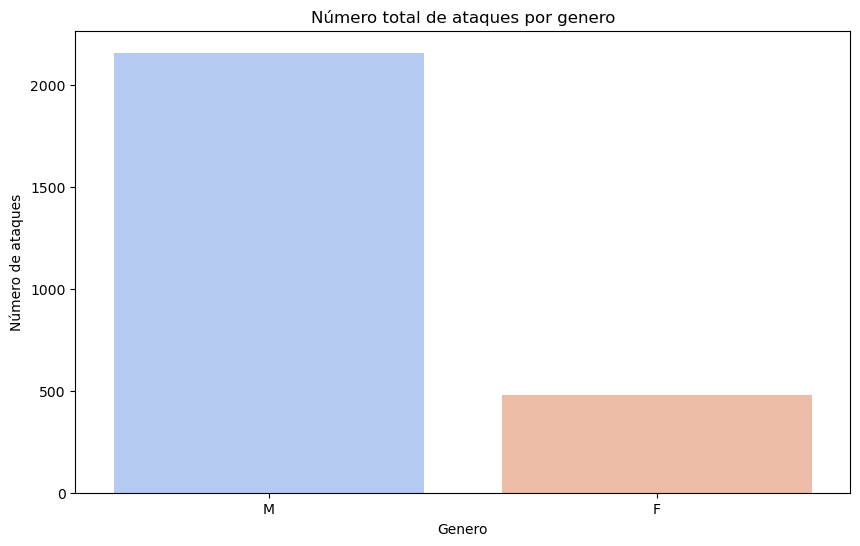

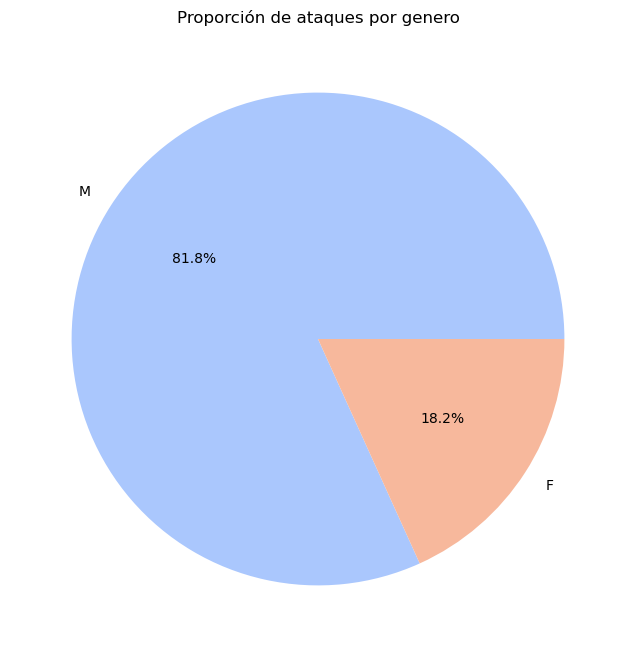

In [14]:
analyze_attacks_by_sex(df)

Número de ataques fatales por genero:
sex
M    247
F     42
Name: count, dtype: int64

Proporción de ataques fatales por genero:
sex
M    0.854671
F    0.145329
Name: count, dtype: float64


c:\Users\Usuario\Desktop\IRONHACK EXERCISES\SHARK ATTACK PROJECT\PROYECTO FINAL\functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='count', data=fatal_attacks_by_sex_df, palette='coolwarm', errorbar=None)


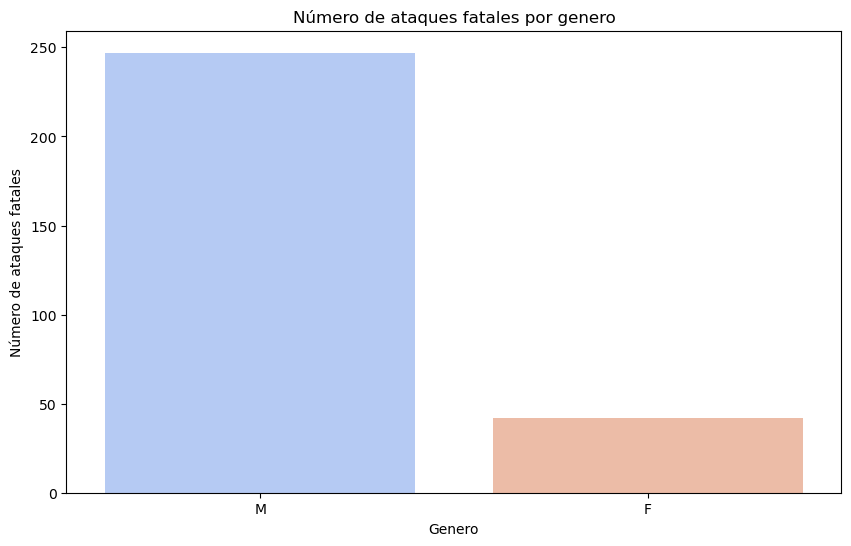

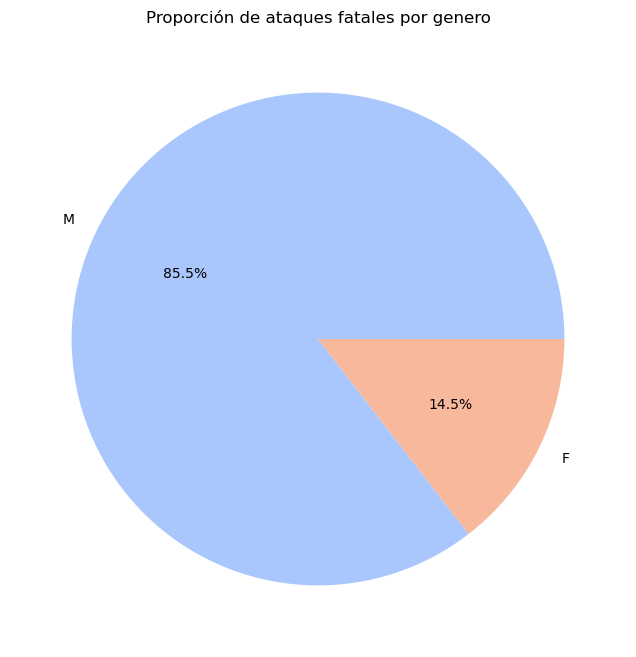

In [15]:
analyze_fatal_attacks(df)

Número de ataques por año:
year
1993     45
1994     49
1995     72
1996     53
1997     53
1998     61
1999     62
2000     86
2001     84
2002     82
2003     87
2004     83
2005     93
2006     98
2007    108
2008    116
2009    115
2010    101
2011    123
2012    110
2013    121
2014    116
2015    141
2016    127
2017    134
2018    124
2019    111
2020     96
2021    107
2022     95
2023    106
Name: count, dtype: int64
El porcentaje de aumento en ataques de tiburones entre 1994 y 2023 es: 116.33%


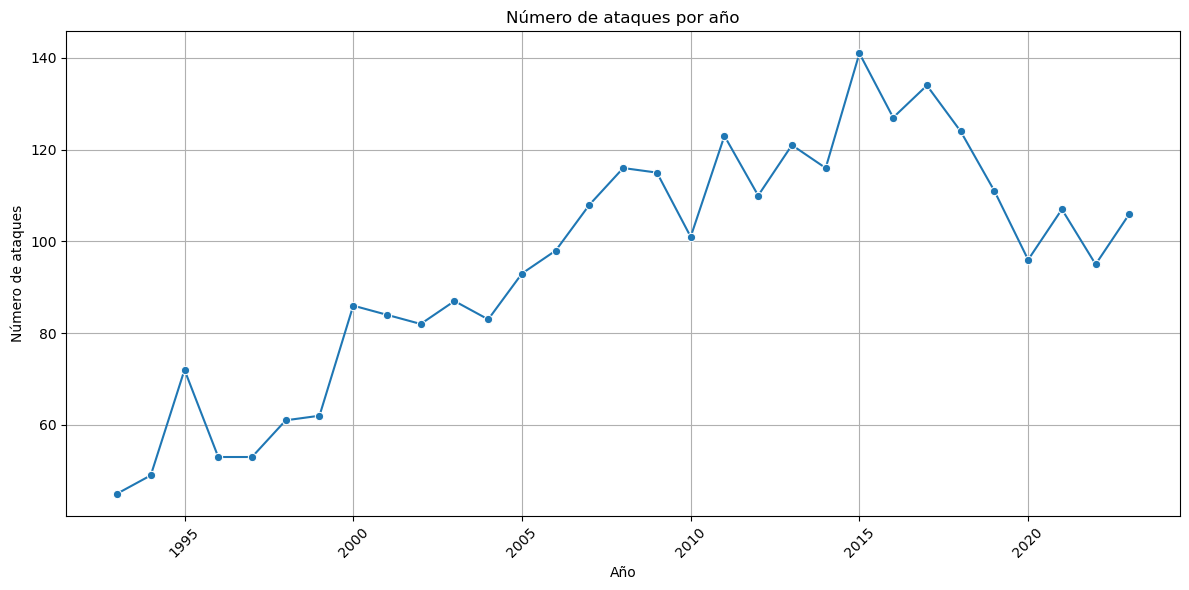

In [16]:
analyze_attacks_by_year(df)